### [실패율](https://school.programmers.co.kr/learn/courses/30/lessons/42889)

In [6]:
def solution(N, stages):
    fail_pass = [0] * (N+2)
    for stage in stages:
        for i in range(1, stage+1):
            fail_pass[i] += 1
    scores = [[x, 0] for x in range(N+1)]
    for i in range(1, N+1):
        scores[i][1] = fail_pass[i+1] / fail_pass[i] if fail_pass[i] > 0 else 1
    return [idx for idx, _ in sorted(scores[1:], key=lambda x: (x[1], x[0]))]

In [7]:
N, stages = 5, [4, 2, 1]
solution(N, stages)

[4, 2, 1, 3, 5]

- 위 코드는 매번 각 스테이지를 중복으로 탐색하기에 비효율적이므로, 이를 한 번만 순회할 수 있도록 업데이트

In [ ]:
def solution(N, stages):
    stage_count = [0] * (N + 2)
    for s in stages:
        stage_count[s] += 1
    
    total_players = len(stages)
    result = []
    for i in range(1, N+1):
        if total_players == 0:
            fail_rate = 0
        else:
            fail_rate = stage_count[i] / total_players
        result.append((i, fail_rate))
        total_players -= stage_count[i]
        
    result.sort(key=lambda x: (-x[1], x[0]))
    return [r[0] for r in result]


### [[1차] 다트 게임](https://school.programmers.co.kr/learn/courses/30/lessons/17682)

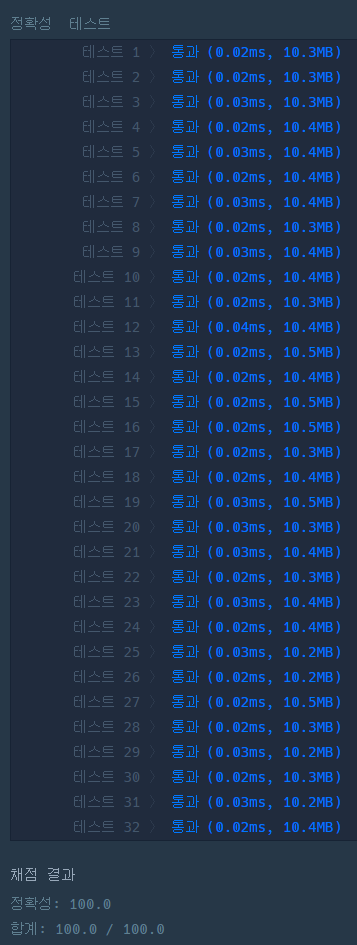

In [ ]:
from collections import deque

def solution(dartResult):
    answer = 0
    before = 0
    dartResult = deque([x for x in dartResult])
    while dartResult:
        s = dartResult.popleft()
        num = int(s)
        if num == 1 and dartResult[0] == '0':
            dartResult.popleft()
            num = 10
        times = dartResult.popleft()
        bonus = 3 if times == 'T' else (2 if times == 'D' else 1)
        cur = num ** bonus
        if dartResult and dartResult[0] in ['*', '#']:
            option = dartResult.popleft()
            if option == '*':
                before *= 2
                cur *= 2
            elif option == '#':
                cur *= -1
        
        answer += before
        before = cur
    answer += cur
    return answer

In [18]:
dartResult = "1D2S#10S"
solution(dartResult)

deque(['1', 'D', '2', 'S', '#', '1', '0', 'S'])
deque(['2', 'S', '#', '1', '0', 'S'])
deque(['1', '0', 'S'])


9

- 정규표현식을 이용한 풀이

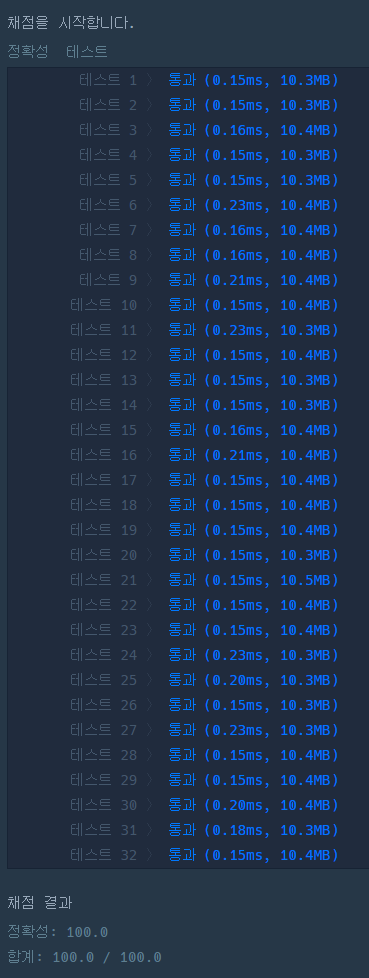

In [19]:
import re

p = re.compile('(\d+)([SDT])([*#]?)')
dart = p.findall(dartResult)
print(dart)

[('1', 'D', ''), ('2', 'S', '#'), ('10', 'S', '')]


In [21]:
import re

def solution(dartResult):
    trigger = {'S' : 1, 'D' : 2, 'T' : 3}
    p = re.compile('(\d+)([SDT])([*#]?)')
    dart = p.findall(dartResult)
    
    answer = 0
    before = 0
    for num, bonus, option in dart:
        num = int(num)
        bonus = trigger[bonus]
        cur = num ** bonus
        if option == '*':
            before *= 2
            cur *= 2
        elif option == '#':
            cur *= -1
        answer += before
        before = cur
    answer += before
    return answer